# 1. Latar Belakang dan Rumusan Masalah

Transjakarta adalah sistem transportasi bus rapid transit (BRT) di Jakarta yang melayani jutaan penumpang setiap harinya. Data transjakarta ini dapat memberikan wawasan berharga tentang pola penggunaan, efisiensi operasional, dan kepuasan pelanggan. Analisis data ini penting untuk meningkatkan layanan dan membuat keputusan yang lebih baik.

# 2. Tujuan
- Mengidentifikasi dan menangani anomali dalam data pola penggunaan Transjakarta.
- Melakukan visualisasi data untuk memahami distribusi.
- Melakukan analisis statistik untuk mendapatkan insight yang dapat digunakan untuk meningkatkan layanan Transjakarta.
- Memberikan rekomendasi yang dapat diimplementasikan oleh manajemen Transjakarta.

# 3. Data

In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [34]:
# Membaca file CSV
file_path = 'D:/BOOTCAMP PWDHK/02. Modul 2/02. Soal/Capstone Project Modul 2/Transjakarta.csv'
df = pd.read_csv(file_path)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

# 4. Proses
## A. Data Cleaning
a. Identifikasi dan Penanganan Missing Values
- Menggunakan metode forward fill, backward fill, dan pengisian dengan nilai konstanta.
- Metode ini dipilih untuk mengisi data yang hilang dengan cara yang paling sesuai dengan konteks data.

In [36]:
# Identifikasi missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64


DataFrame ini memiliki beberapa kolom dengan nilai yang hilang (missing values). Kolom transID, payCardID, payCardBank, payCardName, payCardSex, payCardBirthDate, direction, tapInStopsName, tapInStopsLat, tapInStopsLon, stopStartSeq, dan tapInTime tidak memiliki nilai yang hilang. Namun, kolom corridorID dan tapInStops masing-masing memiliki 1257 dan 1213 nilai hilang, sementara corridorName memiliki 1930 nilai hilang. Kolom tapOutStops memiliki jumlah nilai hilang tertinggi dengan 2289, diikuti oleh tapOutStopsName, tapOutStopsLat, tapOutStopsLon, stopEndSeq, dan tapOutTime yang masing-masing memiliki 1344 nilai hilang. Selain itu, kolom payAmount memiliki 1007 nilai hilang. Kolom-kolom dengan jumlah nilai hilang yang signifikan ini memerlukan perhatian khusus dalam proses pembersihan data.

In [37]:
# Penanganan missing values
# Mengisi missing values dengan metode forward fill
df.fillna(method='ffill', inplace=True)
# Mengisi missing values dengan metode backward fill
df.fillna(method='bfill', inplace=True)
# Mengisi missing values dengan nilai konstanta
df.fillna(value=0, inplace=True)

# Menampilkan data setelah penanganan missing values
print("\nData setelah penanganan missing values:\n", df.head())

C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\2361856972.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\2361856972.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)



Data setelah penanganan missing values:
           transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  .

Metode berbeda untuk menangani nilai yang hilang dalam DataFrame: forward fill, backward fill, dan pengisian dengan nilai konstanta. Pendekatan ini memastikan bahwa semua nilai yang hilang diisi, mengurangi potensi masalah yang disebabkan oleh data yang tidak lengkap dalam analisis selanjutnya.

In [38]:
# Menampilkan jumlah missing values setelah penanganan setiap kolom
missing_values_after_handling = df.isnull().sum()
print("\nMissing values per column after handling:\n", missing_values_after_handling)



Missing values per column after handling:
 transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64


b. Identifikasi dan Penanganan Outliers
- Menggunakan Z-score untuk mendeteksi outliers.
- Z-score adalah metode yang umum digunakan untuk mendeteksi outliers dalam data numerik.

In [39]:
# Identifikasi outliers menggunakan Z-score
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)

# Menampilkan jumlah outliers
print("\nJumlah outliers:", outliers.sum())


Jumlah outliers: 4949


Pada tahap ini pertama-tama memilih kolom-kolom numerik dalam DataFrame df menggunakan df.select_dtypes(include=[np.number]).columns. Kemudian, menghitung Z-score untuk setiap nilai dalam kolom-kolom numerik tersebut menggunakan stats.zscore, yang mengukur seberapa jauh nilai tersebut dari rata-rata dalam satuan standar deviasi. Nilai absolut dari Z-score disimpan dalam z_scores. Selanjutnya mengidentifikasi baris-baris yang memiliki setidaknya satu Z-score lebih besar dari 3 (yang dianggap sebagai outlier) dengan outliers = (z_scores > 3).any(axis=1). Hasilnya adalah sebuah boolean array outliers yang menunjukkan baris mana yang mengandung outlier. Akhirnya, script mencetak jumlah total outlier yang ditemukan, yaitu 4949, menunjukkan bahwa ada 4949 baris dalam DataFrame yang mengandung setidaknya satu nilai outlier.

In [40]:
# Penanganan outliers
df = df[~outliers]

# Menampilkan data setelah penanganan outliers
print("\nData setelah penanganan outliers:\n", df.head())


Data setelah penanganan outliers:
           transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... tap

In [41]:
# Menghitung jumlah outliers setelah dilakukan proses penanganan
z_scores_after_handling = np.abs(stats.zscore(df[numeric_cols]))
outliers_after_handling = (z_scores_after_handling > 3).any(axis=1)

# Menampilkan jumlah outliers setelah penanganan
print("\nJumlah outliers setelah penanganan:", outliers_after_handling.sum())


Jumlah outliers setelah penanganan: 1469


c. Data Formatting
- Memastikan kolom tanggal dalam format datetime.
- Format datetime diperlukan untuk analisis waktu yang akurat.

In [42]:
# Data formatting
# Memastikan kolom tanggal dalam format datetime
date_columns = ['tapInTime', 'tapOutTime']
existing_date_columns = [col for col in date_columns if col in df.columns]
df[existing_date_columns] = df[existing_date_columns].apply(pd.to_datetime, errors='coerce')

# Menampilkan data setelah data formatting
print("\nData setelah data formatting:\n", df.head())


Data setelah data formatting:
           transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... tapInSt

C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\1711536743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[existing_date_columns] = df[existing_date_columns].apply(pd.to_datetime, errors='coerce')


Tahap ini memastikan bahwa kolom tanggal dalam DataFrame df diformat dengan benar sebagai tipe data datetime. Pertama, kolom yang seharusnya berisi data tanggal didefinisikan dalam daftar date_columns, dan kemudian kolom yang ada dalam DataFrame diperiksa dan disimpan dalam existing_date_columns. Selanjutnya, kolom-kolom ini dikonversi ke format datetime menggunakan pd.to_datetime dengan parameter errors='coerce', yang mengubah nilai yang tidak dapat dikonversi menjadi NaT (Not a Time). Metode ini penting untuk memastikan bahwa data tanggal diformat dengan benar, yang diperlukan untuk analisis waktu dan manipulasi data yang akurat.

c. Identifikasi dan Penanganan Data Duplikat
- Menghitung dan menghapus data duplikat.
- Data duplikat dapat menyebabkan bias dalam analisis.

In [43]:
# Identifikasi data duplikat
duplicate_counts = df.duplicated(subset=df.columns, keep=False).sum()
print("\nJumlah data duplikat:", duplicate_counts)

# Penanganan data duplikat
df.drop_duplicates(inplace=True)

# Menampilkan data setelah penanganan data duplikat
print("\nData setelah penanganan data duplikat:\n", df.head())



Jumlah data duplikat: 0

Data setelah penanganan data duplikat:
           transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

  

C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\1310592080.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Metode yang digunakan untuk mengidentifikasi dan menangani data duplikat dalam DataFrame df. Pertama, duplicate_counts = df.duplicated(subset=df.columns, keep=False).sum() menghitung jumlah baris duplikat dalam DataFrame dengan memeriksa semua kolom dan mempertahankan semua duplikat untuk perhitungan. Hasilnya disimpan dalam duplicate_counts dan dicetak untuk menunjukkan jumlah total data duplikat. Selanjutnya, df.drop_duplicates(inplace=True) menghapus semua baris duplikat dari DataFrame, hanya menyisakan baris unik. Penggunaan inplace=True memastikan bahwa perubahan dilakukan langsung pada DataFrame df tanpa membuat salinan baru. Metode ini penting untuk memastikan integritas data dan menghindari analisis yang bias akibat data yang berulang.

In [44]:
# Verifikasi hasil data cleaning
print("\nInformasi data setelah cleaning:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32951 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           32951 non-null  object        
 1   payCardID         32951 non-null  int64         
 2   payCardBank       32951 non-null  object        
 3   payCardName       32951 non-null  object        
 4   payCardSex        32951 non-null  object        
 5   payCardBirthDate  32951 non-null  int64         
 6   corridorID        32951 non-null  object        
 7   corridorName      32951 non-null  object        
 8   direction         32951 non-null  float64       
 9   tapInStops        32951 non-null  object        
 10  tapInStopsName    32951 non-null  object        
 11  tapInStopsLat     32951 non-null  float64       
 12  tapInStopsLon     32951 non-null  float64       
 13  stopStartSeq      32951 non-null  int64         
 14  tapInTime         32951 non

In [45]:
print("\nContoh data setelah cleaning:\n", df.head())


Contoh data setelah cleaning:
           transID         payCardID payCardBank      payCardName payCardSex  \
0  EIIW227B8L34VB   180062659848800      emoney   Bajragin Usada          M   
1  LGXO740D2N47GZ  4885331907664776         dki     Gandi Widodo          F   
2  DJWR385V2U57TO  4996225095064169         dki    Emong Wastuti          F   
3  JTUZ800U7C86EH      639099174703       flazz     Surya Wacana          F   
4  VMLO535V7F95NJ      570928206772       flazz  Embuh Mardhiyah          M   

   payCardBirthDate corridorID                              corridorName  \
0              2008          5                     Matraman Baru - Ancol   
1              1997         6C  Stasiun Tebet - Karet via Patra Kuningan   
2              1992        R1A                        Pantai Maju - Kota   
3              1978        11D       Pulo Gebang - Pulo Gadung 2 via PIK   
4              1982         12                     Tanjung Priok - Pluit   

   direction tapInStops  ... tapInSt

## B. Data Visualisation
- Menggunakan histogram untuk distribusi waktu penggunaan
- Menggunakan line plot untuk melihat tren penggunaan harian

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


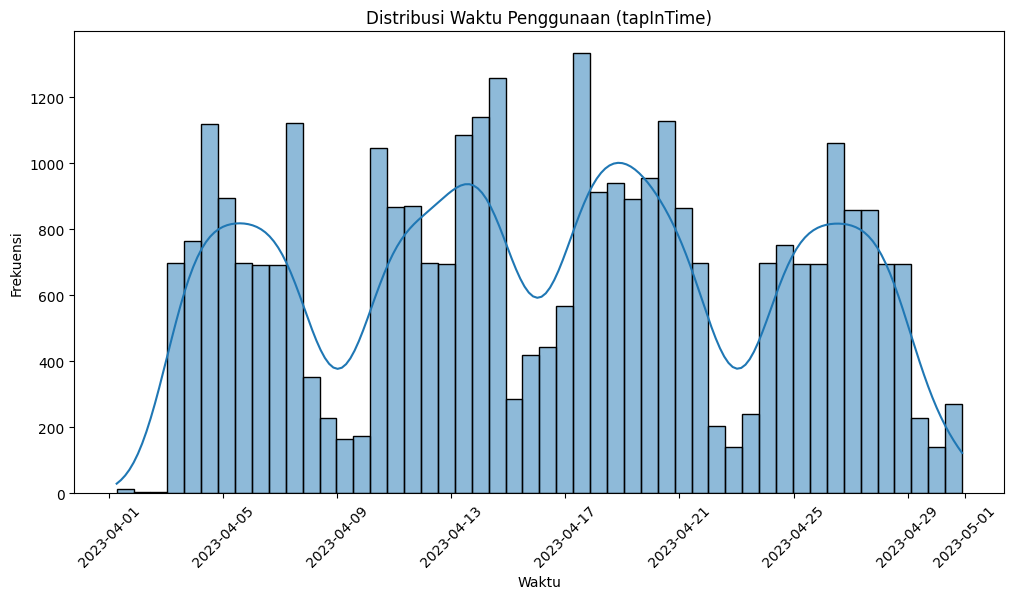

In [46]:
# Menggunakan histogram untuk distribusi waktu penggunaan
plt.figure(figsize=(12, 6))
sns.histplot(df['tapInTime'].dropna(), bins=50, kde=True)
plt.title('Distribusi Waktu Penggunaan (tapInTime)')
plt.xlabel('Waktu')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)
plt.show()

Terlihat bahwa frekuensi penggunaan bervariasi sepanjang bulan April 2023. Ada beberapa puncak frekuensi yang signifikan, terutama pada awal dan pertengahan bulan, dengan frekuensi tertinggi mencapai lebih dari 1200. Pola ini menunjukkan bahwa ada hari-hari tertentu dengan aktivitas penggunaan yang sangat tinggi, sementara pada hari-hari lainnya, frekuensi penggunaan cenderung lebih rendah. Grafik ini juga menunjukkan pola mingguan, di mana frekuensi penggunaan cenderung menurun pada akhir pekan dan meningkat kembali pada hari kerja. Secara keseluruhan, grafik ini mencerminkan fluktuasi penggunaan layanan yang dipengaruhi oleh hari dalam minggu dan mungkin juga oleh faktor-faktor lain seperti acara atau kondisi khusus pada hari-hari tertentu.

C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\3078934334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['tapInTime'].dt.date


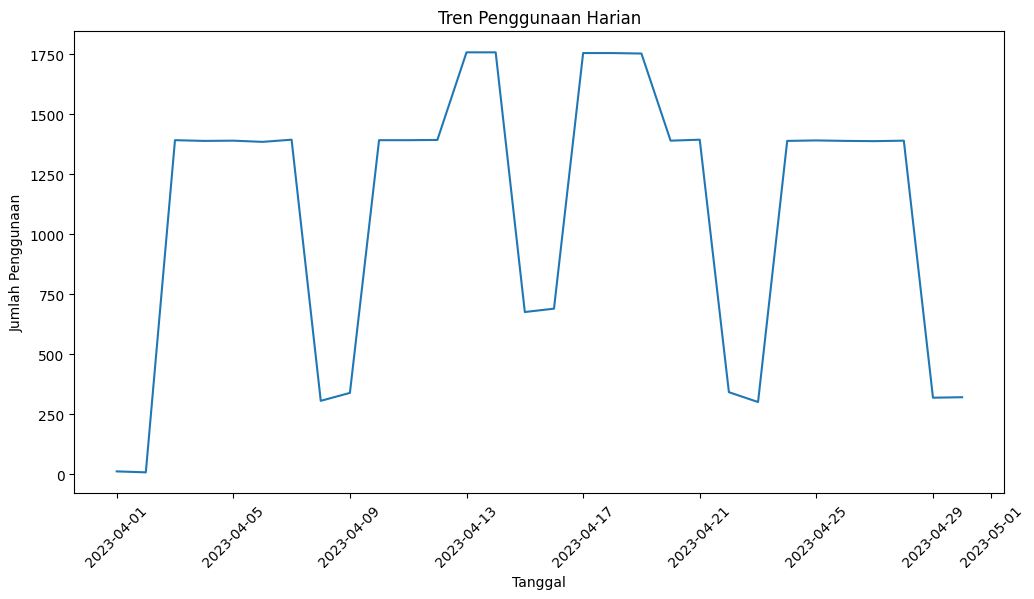

In [47]:
# Menggunakan line plot untuk melihat tren penggunaan harian
df['date'] = df['tapInTime'].dt.date
daily_usage = df.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_usage.plot(kind='line')
plt.title('Tren Penggunaan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)
plt.show()

Jumlah penggunaan mengalami fluktuasi yang signifikan sepanjang bulan April 2023. Pada hari kerja, jumlah penggunaan cenderung tinggi, mendekati atau melebihi 1500, dengan beberapa puncak mencapai sekitar 1750. Sebaliknya, pada akhir pekan, jumlah penggunaan menurun drastis, sering kali di bawah 500. Pola ini menunjukkan bahwa penggunaan layanan lebih tinggi dan konsisten pada hari kerja, sementara pada akhir pekan, penggunaan cenderung lebih rendah dan bervariasi. Fluktuasi yang tajam antara hari kerja dan akhir pekan mencerminkan perbedaan pola aktivitas pengguna antara kedua periode tersebut.

## C. Analisis
a. Statistika Deskriptif
- Menggunakan mean, median, dan standar deviasi untuk memahami distribusi data.
- Statistika deskriptif memberikan gambaran umum tentang data.


In [48]:
# Statistika Deskriptif
print("\nStatistika Deskriptif:")
print(df.describe())

# Menambahkan kolom hari dalam seminggu
df['day_of_week'] = df['tapInTime'].dt.dayofweek

# Menambahkan kolom untuk menandai hari kerja dan akhir pekan
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Mengelompokkan data berdasarkan hari kerja dan akhir pekan
weekday_usage = df[df['is_weekend'] == 0].groupby('date').size()
weekend_usage = df[df['is_weekend'] == 1].groupby('date').size()


Statistika Deskriptif:
          payCardID  payCardBirthDate     direction  tapInStopsLat  \
count  3.295100e+04      32951.000000  32951.000000   32951.000000   
mean   1.390324e+17       1990.203727      0.501836      -6.213639   
min    6.040368e+10       1951.000000      0.000000      -6.387532   
25%    1.800042e+14       1982.000000      0.000000      -6.245574   
50%    2.635488e+15       1990.000000      1.000000      -6.214132   
75%    4.441968e+15       2000.000000      1.000000      -6.174207   
max    4.387419e+18       2012.000000      1.000000      -6.089429   
std    7.447608e+17         12.769015      0.500004       0.057660   

       tapInStopsLon  stopStartSeq                      tapInTime  \
count   32951.000000  32951.000000                          32951   
mean      106.844312     13.467421  2023-04-16 08:11:50.051167232   
min       106.670160      0.000000            2023-04-01 06:22:27   
25%       106.805610      4.000000     2023-04-10 09:19:37.500000   


C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\4085764732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['tapInTime'].dt.dayofweek
C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\4085764732.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [49]:
# Statistika Deskriptif untuk hari kerja dan akhir pekan
print("\nStatistika Deskriptif untuk Hari Kerja:")
print(weekday_usage.describe())


Statistika Deskriptif untuk Hari Kerja:
count      20.000000
mean     1481.850000
std       162.290278
min      1385.000000
25%      1389.750000
50%      1392.000000
75%      1483.750000
max      1758.000000
dtype: float64


Statistika deskriptif untuk penggunaan pada hari kerja menunjukkan bahwa dari 20 observasi, rata-rata jumlah penggunaan adalah 1481.85 dengan standar deviasi 162.29, yang menunjukkan variasi yang relatif kecil. Nilai minimum penggunaan adalah 1385, sedangkan nilai maksimum adalah 1758. Kuartil pertama (25%) adalah 1389.75, median (50%) adalah 1392, dan kuartil ketiga (75%) adalah 1483.75, yang menunjukkan bahwa sebagian besar data berada di antara 1389.75 dan 1483.75 penggunaan. Kesimpulannya, penggunaan pada hari kerja cenderung tinggi dan konsisten, dengan variasi yang lebih kecil dibandingkan dengan akhir pekan, menunjukkan pola penggunaan yang lebih stabil.

In [50]:
print("\nStatistika Deskriptif untuk Akhir Pekan:")
print(weekend_usage.describe())


Statistika Deskriptif untuk Akhir Pekan:
count     10.000000
mean     331.400000
std      225.079838
min        8.000000
25%      302.250000
50%      320.000000
75%      341.250000
max      690.000000
dtype: float64


Statistika deskriptif untuk penggunaan pada akhir pekan menunjukkan bahwa dari 10 observasi, rata-rata jumlah penggunaan adalah 331.4 dengan standar deviasi 225.08, yang menunjukkan variasi yang cukup besar. Nilai minimum penggunaan adalah 8, sedangkan nilai maksimum adalah 690. Kuartil pertama (25%) adalah 302.25, median (50%) adalah 320, dan kuartil ketiga (75%) adalah 341.25, yang menunjukkan bahwa sebagian besar data berada di antara 302.25 dan 341.25 penggunaan. Kesimpulannya, penggunaan pada akhir pekan cenderung lebih rendah dan bervariasi dibandingkan dengan hari kerja, dengan beberapa hari menunjukkan penggunaan yang sangat rendah dan beberapa hari lainnya menunjukkan penggunaan yang lebih tinggi.

b. Statistika Inferensial
- Menggunakan uji statistik untuk menguji hipotesis tertentu.
- Statistika inferensial membantu dalam membuat kesimpulan yang lebih umum dari data sampel.

In [51]:
# Statistika Inferensial
# Uji t-test untuk menguji hipotesis perbedaan penggunaan antara hari kerja dan akhir pekan
t_stat, p_value = stats.ttest_ind(weekday_usage, weekend_usage, equal_var=False)

print("\nHasil Uji t-test:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")


Hasil Uji t-test:
t-statistic: 14.39976235184753
p-value: 1.011404875356029e-09


Hasil uji t-test yang diberikan menunjukkan dua nilai penting: t-statistic dan p-value. Berikut penjelasannya:
- t-statistic (14.39976235184753):
Ini adalah nilai statistik t yang dihitung dari data. Nilai ini menunjukkan seberapa besar perbedaan antara dua kelompok (dalam hal ini, penggunaan pada hari kerja dan akhir pekan) relatif terhadap variasi dalam data. Semakin besar nilai t, semakin besar perbedaan antara dua kelompok tersebut.
- p-value (1.011404875356029e-09):
Ini adalah probabilitas bahwa perbedaan yang diamati antara dua kelompok terjadi secara kebetulan. Nilai p yang sangat kecil (seperti 1.011404875356029e-09) menunjukkan bahwa sangat tidak mungkin perbedaan yang diamati terjadi secara kebetulan. Dalam konteks ini, nilai p yang sangat kecil menunjukkan bahwa ada perbedaan yang signifikan secara statistik antara penggunaan pada hari kerja dan akhir pekan.
- Kesimpulan
Dengan t-statistic yang tinggi dan p-value yang sangat kecil, kita dapat menyimpulkan bahwa ada perbedaan yang signifikan secara statistik antara penggunaan pada hari kerja dan akhir pekan. Ini berarti bahwa pola penggunaan pada hari kerja berbeda secara signifikan dari pola penggunaan pada akhir pekan.

# 5. Analisis dan Insight

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


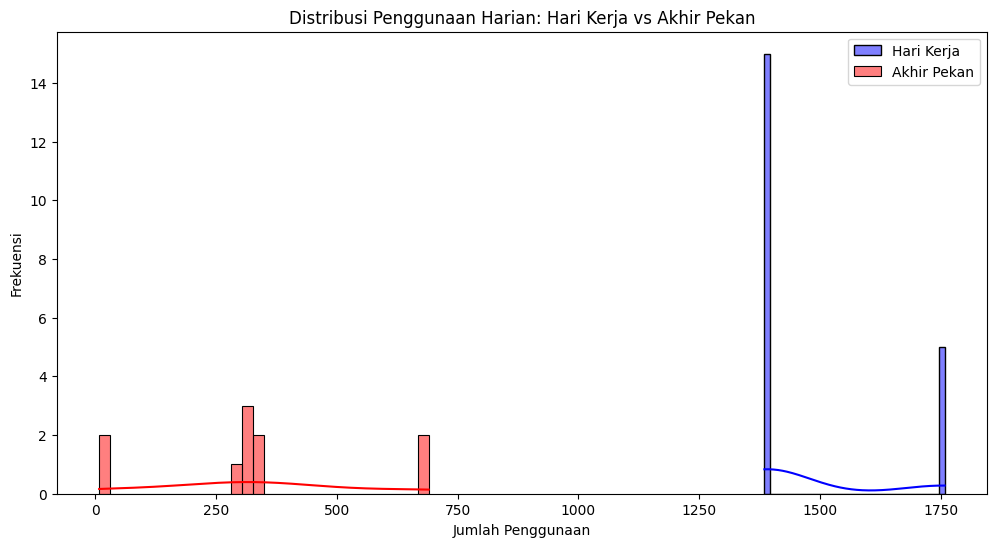

In [52]:
# Visualisasi Distribusi Penggunaan Harian
plt.figure(figsize=(12, 6))
sns.histplot(weekday_usage, bins=30, kde=True, color='blue', label='Hari Kerja')
sns.histplot(weekend_usage, bins=30, kde=True, color='red', label='Akhir Pekan')
plt.title('Distribusi Penggunaan Harian: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jumlah Penggunaan')
plt.ylabel('Frekuensi')
plt.legend()
plt.show()

Distribusi hari kerja (biru) menunjukkan dua puncak yang sangat menonjol pada sekitar 1500 dan 1750 jumlah penggunaan, menunjukkan bahwa pada hari kerja, ada beberapa hari dengan jumlah penggunaan yang sangat tinggi, sementara sebagian besar hari kerja memiliki jumlah penggunaan yang lebih rendah dengan frekuensi yang tersebar di berbagai jumlah penggunaan. Sebaliknya, distribusi penggunaan pada akhir pekan (merah) lebih tersebar dan tidak memiliki puncak yang sangat menonjol seperti pada hari kerja, dengan jumlah penggunaan yang cenderung lebih rendah dan sebagian besar frekuensi berada di bawah 500 jumlah penggunaan.

C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\4256448727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['tapInTime'].dt.hour
c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


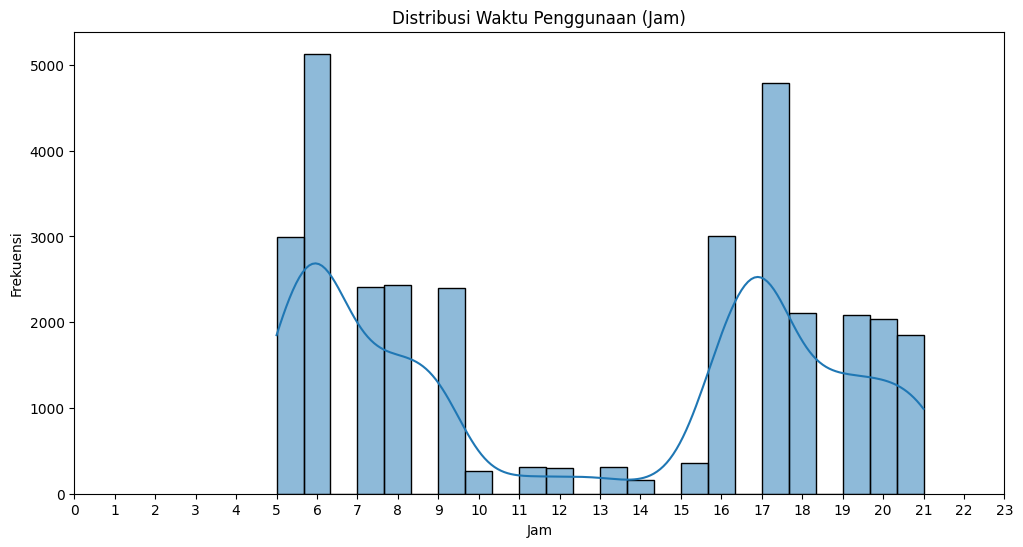

In [53]:
# Distribusi Waktu Penggunaan
df['hour'] = df['tapInTime'].dt.hour
plt.figure(figsize=(12, 6))
sns.histplot(df['hour'].dropna(), bins=24, kde=True)
plt.title('Distribusi Waktu Penggunaan (Jam)')
plt.xlabel('Jam')
plt.ylabel('Frekuensi')
plt.xticks(range(0, 24))
plt.show()

Terlihat dua puncak utama dalam distribusi ini: satu pada pagi hari sekitar pukul 6-7 dengan frekuensi tertinggi mencapai lebih dari 5000, dan satu lagi pada sore hari sekitar pukul 17-18 dengan frekuensi yang juga tinggi. Ini menunjukkan bahwa penggunaan paling banyak terjadi pada jam-jam sibuk pagi dan sore hari, yang kemungkinan besar berhubungan dengan jam berangkat dan pulang kerja atau sekolah. Di luar jam-jam tersebut, frekuensi penggunaan cenderung lebih rendah, dengan penggunaan yang relatif stabil dari pukul 10 hingga 15 dan menurun drastis pada tengah malam hingga dini hari.

C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\2068950972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['tapInTime'].dt.date
C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\2068950972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df['tapInTime'].dt.dayofweek
C:\Users\Acer\AppData\Local\Temp\ipykernel_25116\2068950972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

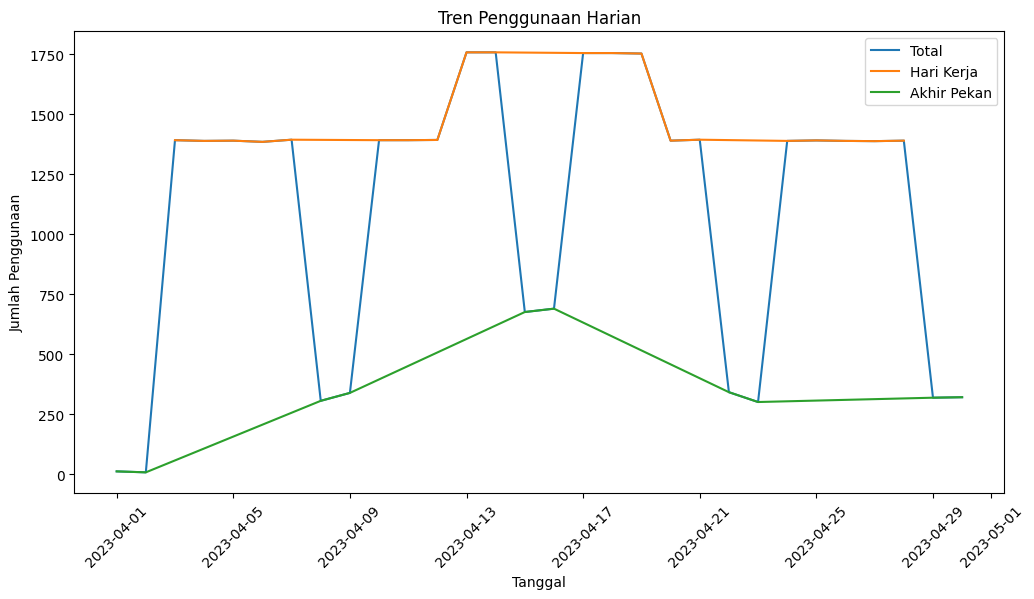

In [54]:
# Tren Harian dan Mingguan
df['date'] = df['tapInTime'].dt.date
df['day_of_week'] = df['tapInTime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

daily_usage = df.groupby('date').size()
weekday_usage = df[df['is_weekend'] == 0].groupby('date').size()
weekend_usage = df[df['is_weekend'] == 1].groupby('date').size()

plt.figure(figsize=(12, 6))
daily_usage.plot(kind='line', label='Total')
weekday_usage.plot(kind='line', label='Hari Kerja')
weekend_usage.plot(kind='line', label='Akhir Pekan')
plt.title('Tren Penggunaan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penggunaan')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Terdapat tiga garis yang mewakili total penggunaan (biru), penggunaan pada hari kerja (oranye), dan penggunaan pada akhir pekan (hijau). Garis biru menunjukkan fluktuasi yang signifikan, dengan puncak penggunaan yang tinggi pada hari kerja dan penurunan tajam pada akhir pekan. Garis oranye yang mewakili hari kerja menunjukkan jumlah penggunaan yang konsisten tinggi, mendekati 1750, sementara garis hijau yang mewakili akhir pekan menunjukkan peningkatan yang lebih bertahap dan jumlah penggunaan yang lebih rendah, dengan puncak sekitar 500. Pola ini mengindikasikan bahwa penggunaan layanan lebih tinggi dan lebih konsisten pada hari kerja dibandingkan dengan akhir pekan, di mana penggunaan cenderung lebih rendah dan bervariasi.

# 6. Rekomendasi

In [55]:
# Insight dan Rekomendasi
# Mengidentifikasi jam sibuk pagi dan sore hari
peak_hours = df['hour'].value_counts().sort_index()
morning_peak = peak_hours.loc[6:9].idxmax()
evening_peak = peak_hours.loc[16:19].idxmax()

print(f"Jam sibuk pagi: {morning_peak}:00 - {morning_peak+1}:00")
print(f"Jam sibuk sore: {evening_peak}:00 - {evening_peak+1}:00")

# Rekomendasi
print("\nRekomendasi:")
print("1. Penambahan armada pada jam sibuk pagi dan sore hari untuk mengurangi kepadatan.")
print("2. Penyesuaian jadwal keberangkatan untuk mengakomodasi peningkatan jumlah penumpang pada jam sibuk.")
print("3. Peningkatan layanan pelanggan dengan menyediakan informasi real-time tentang jadwal dan ketersediaan armada.")

Jam sibuk pagi: 6:00 - 7:00
Jam sibuk sore: 17:00 - 18:00

Rekomendasi:
1. Penambahan armada pada jam sibuk pagi dan sore hari untuk mengurangi kepadatan.
2. Penyesuaian jadwal keberangkatan untuk mengakomodasi peningkatan jumlah penumpang pada jam sibuk.
3. Peningkatan layanan pelanggan dengan menyediakan informasi real-time tentang jadwal dan ketersediaan armada.
